In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
 
from functools import partial
from dynamic_systems.controller import PID
from dynamic_systems.simulation import CSTR
from statsmodels.tsa.stattools import acf
    
plt.style.use('science')
    
# For figure aesthetics 
plt.rcParams['mathtext.fontset'] = 'custom'   
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'   
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'   
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'   
plt.rcParams['font.size'] = 16   
plt.rcParams['mathtext.fontset'] = 'stix'   
plt.rcParams['font.family'] = 'STIXGeneral'  

## System Behavior for variable $Q_{c}$

In [2]:
def cte_Qc(t, obs, Qc=0.0):
    return Qc

In [3]:
t = 0.0; tf = 15; dt = 1e-3; t = np.arange(t, tf, dt)  
x0 = np.array([0.1, 430.882699002514, 416.723084574301])
cstr = CSTR(process_noise=0.0, measurement_noise=0.0)

In [4]:
Qcs = [20, 50, 75, 100, 125, 150, 175, 200]
state_vars = []

for Qc in Qcs:
    u, x, y = cstr(t, x0, u_fn=partial(cte_Qc, Qc=Qc))
    state_vars.append(x)

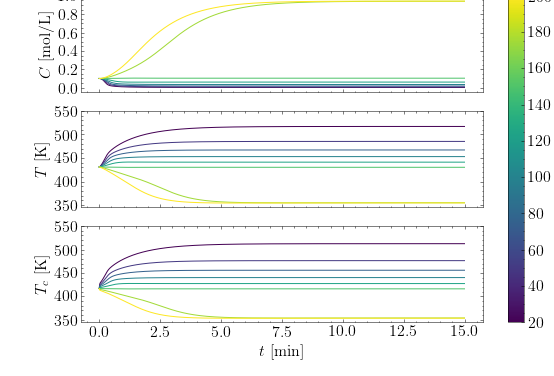

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(9, 6), sharex=True)
norm = mpl.colors.Normalize(vmin=np.min(Qcs), vmax=np.max(Qcs))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
cmap.set_array([])
for v, Qc in zip(state_vars, Qcs):
    axes[0].plot(t, v[:, 0], c=cmap.to_rgba(Qc))
    axes[1].plot(t, v[:, 1], c=cmap.to_rgba(Qc))
    im = axes[2].plot(t, v[:, 2], c=cmap.to_rgba(Qc))
axes[0].set_yticks([i / 10 for i in range(0, 12, 2)])  
axes[1].set_yticks([350, 400, 450, 500, 550])
axes[2].set_yticks([350, 400, 450, 500, 550])
axes[0].set_ylabel(r'$C$ [mol/L]')
axes[1].set_ylabel(r'$T$ [K]')
axes[2].set_ylabel(r'$T_{c}$ [K]')
axes[2].set_xlabel(r'$t$ [min]')
cbar =  fig.colorbar(cmap, ax=axes.ravel().tolist())
cbar.ax.set_ylabel(r'$Q_{c}$', rotation=270, labelpad=30)
plt.savefig('./Figures/Ch6/CSTR_VarQc.pdf')
plt.show()

## Fault Examples

In [12]:
data_mat = np.load('./cstr_rawdata.npy')

X = data_mat[:, :-4]
y = data_mat[:, -4]
d = data_mat[:, -3]
t = np.array([i for i in range(200)])

### Normal Operation

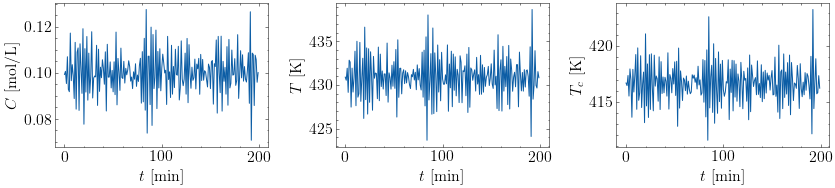

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=False)

axes[0].plot(t, X[1299, 600: 800])
axes[0].set_ylabel('$C$ [mol/L]')
axes[0].set_xlabel('$t$ [min]')

axes[1].plot(t, X[1299, 800: 1000])
axes[1].set_ylabel('$T$ [K]')
axes[1].set_xlabel('$t$ [min]')

axes[2].plot(t, X[1299, 1000: 1200])
axes[2].set_ylabel('$T_{c}$ [K]')
axes[2].set_xlabel('$t$ [min]')

plt.tight_layout()
plt.savefig('./Figures/Presentation/NormalOperation.pdf')

### Catalyst Decay

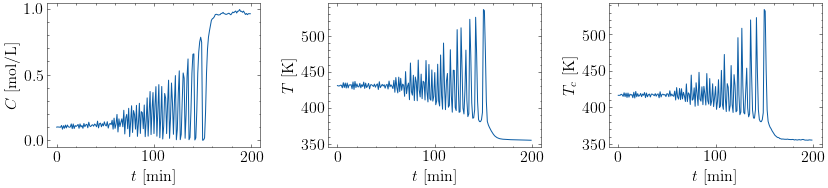

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=False)

axes[0].plot(t, X[0, 600: 800])
axes[0].set_ylabel('$C$ [mol/L]')
axes[0].set_xlabel('$t$ [min]')

axes[1].plot(t, X[0, 800: 1000])
axes[1].set_ylabel('$T$ [K]')
axes[1].set_xlabel('$t$ [min]')

axes[2].plot(t, X[0, 1000: 1200])
axes[2].set_ylabel('$T_{c}$ [K]')
axes[2].set_xlabel('$t$ [min]')

plt.tight_layout()
plt.savefig('./Figures/Presentation/CatalystDecay.pdf')

### Heat Fouling

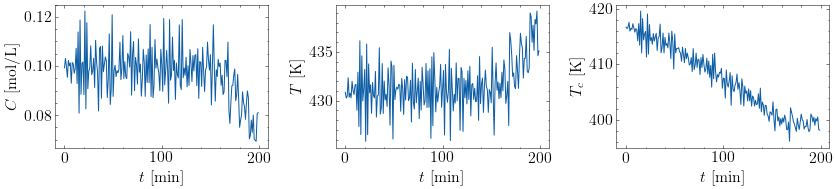

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=False)

axes[0].plot(t, X[100, 600: 800])
axes[0].set_ylabel('$C$ [mol/L]')
axes[0].set_xlabel('$t$ [min]')

axes[1].plot(t, X[100, 800: 1000])
axes[1].set_ylabel('$T$ [K]')
axes[1].set_xlabel('$t$ [min]')

axes[2].plot(t, X[100, 1000: 1200])
axes[2].set_ylabel('$T_{c}$ [K]')
axes[2].set_xlabel('$t$ [min]')

plt.tight_layout()
plt.savefig('./Figures/Presentation/HeatFouling.pdf')

### Sensor Bias

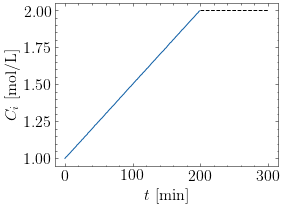

In [31]:
plt.figure(figsize=(4, 3))
plt.plot(t, X[200, 0:200])
plt.plot([200, 300], [2, 2], 'k--')
plt.ylabel('$C_{i}$ [mol/L]')
plt.xlabel('$t$ [min]')

plt.savefig('./Figures/Presentation/CiSensorBias.pdf')

### Input Disturbance

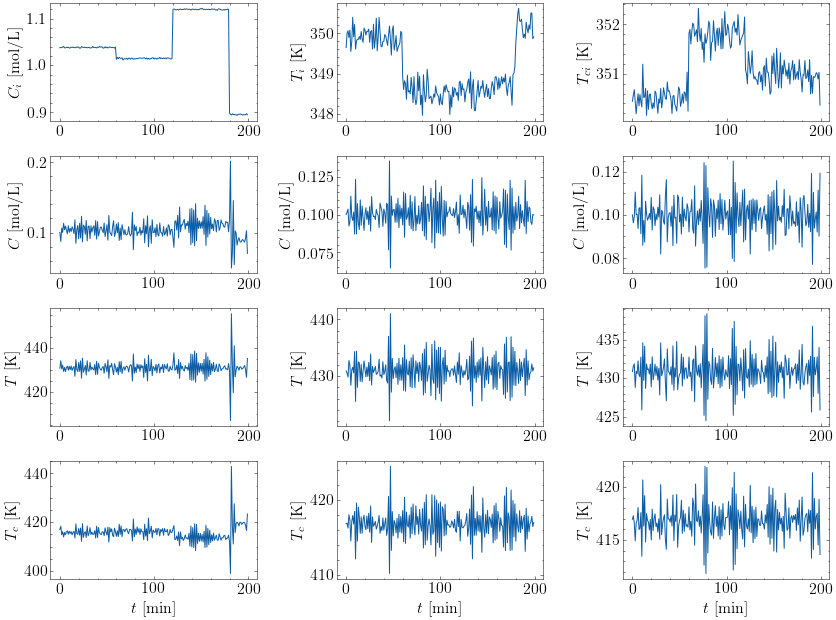

In [43]:
fig, axes = plt.subplots(4, 3, figsize=(12, 9), sharey=False)

axes[0, 0].plot(t, X[900, 0:200])
axes[1, 0].plot(t, X[900, 600: 800])
axes[2, 0].plot(t, X[900, 800: 1000])
axes[3, 0].plot(t, X[900, 1000: 1200])
axes[0, 0].set_ylabel('$C_{i}$ [mol/L]')
axes[1, 0].set_ylabel('$C$ [mol/L]')
axes[2, 0].set_ylabel('$T$ [K]')
axes[3, 0].set_ylabel('$T_{c}$ [K]')
axes[3, 0].set_xlabel('$t$ [min]')

axes[0, 1].plot(t, X[1000, 200:400])
axes[1, 1].plot(t, X[1000, 600: 800])
axes[2, 1].plot(t, X[1000, 800: 1000])
axes[3, 1].plot(t, X[1000, 1000: 1200])
axes[0, 1].set_ylabel('$T_{i}$ [K]')
axes[1, 1].set_ylabel('$C$ [mol/L]')
axes[2, 1].set_ylabel('$T$ [K]')
axes[3, 1].set_ylabel('$T_{c}$ [K]')
axes[3, 1].set_xlabel('$t$ [min]')

axes[0, 2].plot(t, X[1100, 400:600])
axes[1, 2].plot(t, X[1100, 600: 800])
axes[2, 2].plot(t, X[1100, 800: 1000])
axes[3, 2].plot(t, X[1100, 1000: 1200])
axes[0, 2].set_ylabel('$T_{ci}$ [K]')
axes[1, 2].set_ylabel('$C$ [mol/L]')
axes[2, 2].set_ylabel('$T$ [K]')
axes[3, 2].set_ylabel('$T_{c}$ [K]')
axes[3, 2].set_xlabel('$t$ [min]')

plt.tight_layout()
plt.savefig('./Figures/Presentation/InputDisturbance.pdf')

### Sensor Bias and Input Disturbance

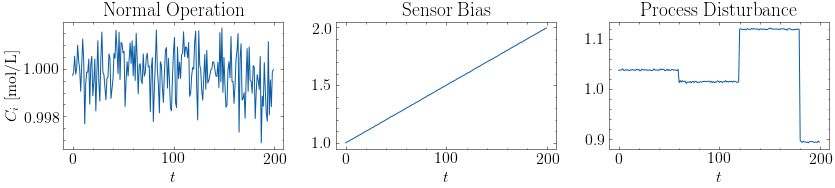

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=False)

axes[0].plot(t, X[0, 0:200])
axes[0].set_ylabel(r'$C_{i}$ [mol/L]')
axes[0].set_xlabel(r'$t$')
axes[0].set_title('Normal Operation')
axes[1].plot(t, X[np.where(y == 2)[0][0], 0:200])
axes[1].set_xlabel(r'$t$')
axes[1].set_title('Sensor Bias')
axes[2].plot(t, X[np.where(y == 9)[0][0], 0:200])
axes[2].set_xlabel(r'$t$')
axes[2].set_title('Process Disturbance')
plt.tight_layout()
plt.savefig('./Figures/Ch6/FaultsOnInputs.pdf')

### Heat Fouling and Catalyst Decay

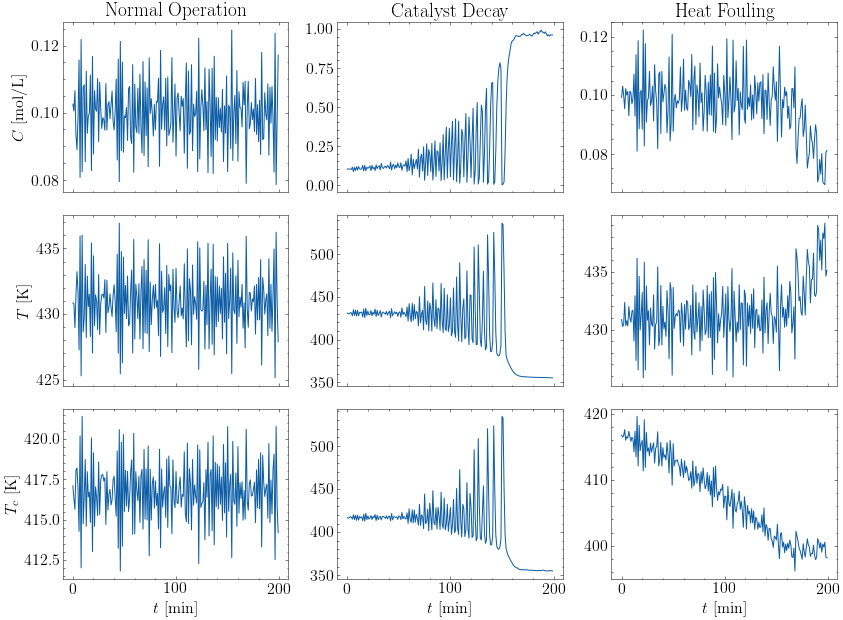

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9), sharex='col')

ind = [int(i * (dt ** -1)) for i in range(200)]
axes[0, 0].plot(t, X[np.where(y == 12)[0][0], 400:600])
axes[0, 0].set_ylabel(r'$C$ [mol/L]')
axes[0, 0].set_title('Normal Operation')
axes[1, 0].set_ylabel(r'$T$ [K]')
axes[1, 0].plot(t, X[np.where(y == 12)[0][0], 600:800])
axes[2, 0].set_ylabel(r'$T_{c}$ [K]')
axes[2, 0].plot(t, X[np.where(y == 12)[0][0], 1200:1400])
axes[2, 0].set_xlabel('$t$ [min]')


axes[0, 1].plot(t, X[np.where(y == 0)[0][0], 400:600])
axes[0, 1].set_title('Catalyst Decay')
axes[1, 1].plot(t, X[np.where(y == 0)[0][0], 600:800])
axes[2, 1].plot(t, X[np.where(y == 0)[0][0], 1200:1400])
axes[2, 1].set_xlabel('$t$ [min]')

axes[0, 2].plot(t, X[np.where(y == 1)[0][0], 400:600])
axes[0, 2].set_title('Heat Fouling')
axes[1, 2].plot(t, X[np.where(y == 1)[0][0], 600:800])
axes[2, 2].plot(t, X[np.where(y == 1)[0][0], 1200:1400])
axes[2, 2].set_xlabel('$t$ [min]')

plt.tight_layout()
plt.savefig('./Figures/Ch6/Faults1and2.pdf')

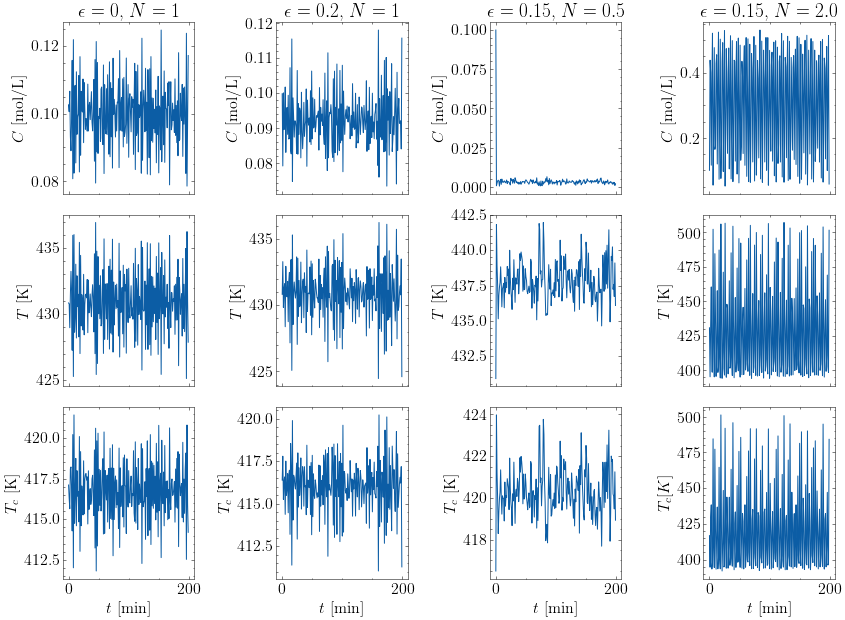

In [11]:
fig, axes = plt.subplots(3, 4, figsize=(12, 9), sharex='col')

ind = np.intersect1d(np.where(d == 0)[0], np.where(y == 12)[0])
axes[0, 0].plot(t, X[ind[0], 400:600])
axes[0, 0].set_ylabel(r'$C$ [mol/L]')
axes[0, 0].set_title('$\epsilon = 0$, $N = 1$')
axes[1, 0].set_ylabel(r'$T$ [K]')
axes[1, 0].plot(t, X[ind[0], 600:800])
axes[2, 0].set_ylabel(r'$T_{c}$ [K]')
axes[2, 0].plot(t, X[ind[0], 1200:1400])
axes[2, 0].set_xlabel('$t$ [min]')

ind = np.intersect1d(np.where(d == 3)[0], np.where(y == 12)[0])
axes[0, 1].plot(t, X[ind[0], 400:600])
axes[0, 1].set_ylabel(r'$C$ [mol/L]')
axes[0, 1].set_title('$\epsilon = 0.2$, $N = 1$')
axes[1, 1].set_ylabel(r'$T$ [K]')
axes[1, 1].plot(t, X[ind[0], 600:800])
axes[2, 1].set_ylabel(r'$T_{c}$ [K]')
axes[2, 1].plot(t, X[ind[0], 1200:1400])
axes[2, 1].set_xlabel('$t$ [min]')

ind = np.intersect1d(np.where(d == 4)[0], np.where(y == 12)[0])
axes[0, 2].plot(t, X[ind[0], 400:600])
axes[0, 2].set_ylabel(r'$C$ [mol/L]')
axes[0, 2].set_title('$\epsilon = 0.15$, $N = 0.5$')
axes[1, 2].set_ylabel(r'$T$ [K]')
axes[1, 2].plot(t, X[ind[0], 600:800])
axes[2, 2].set_ylabel(r'$T_{c}$ [K]')
axes[2, 2].plot(t, X[ind[0], 1200:1400])
axes[2, 2].set_xlabel('$t$ [min]')

ind = np.intersect1d(np.where(d == 6)[0], np.where(y == 12)[0])
axes[0, 3].plot(t, X[ind[0], 400:600])
axes[0, 3].set_ylabel(r'$C$ [mol/L]')
axes[0, 3].set_title('$\epsilon = 0.15$, $N = 2.0$')
axes[1, 3].set_ylabel(r'$T$ [K]')
axes[1, 3].plot(t, X[ind[0], 600:800])
axes[2, 3].set_ylabel(r'$T_{c} [K]$')
axes[2, 3].plot(t, X[ind[0], 1200:1400])
axes[2, 3].set_xlabel('$t$ [min]')


plt.tight_layout()
plt.savefig('./Figures/Ch6/CrossDomainFaults.pdf')